# Ana Garzon y Santiago Diaz

## Proyecto 1 de Vision por computadora.
El objetivo de este proyecto es aplicar filtros y transformaciones a la imagen entregada y observar los resultados.

Cargamos la imagen

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Leemos la imagen.

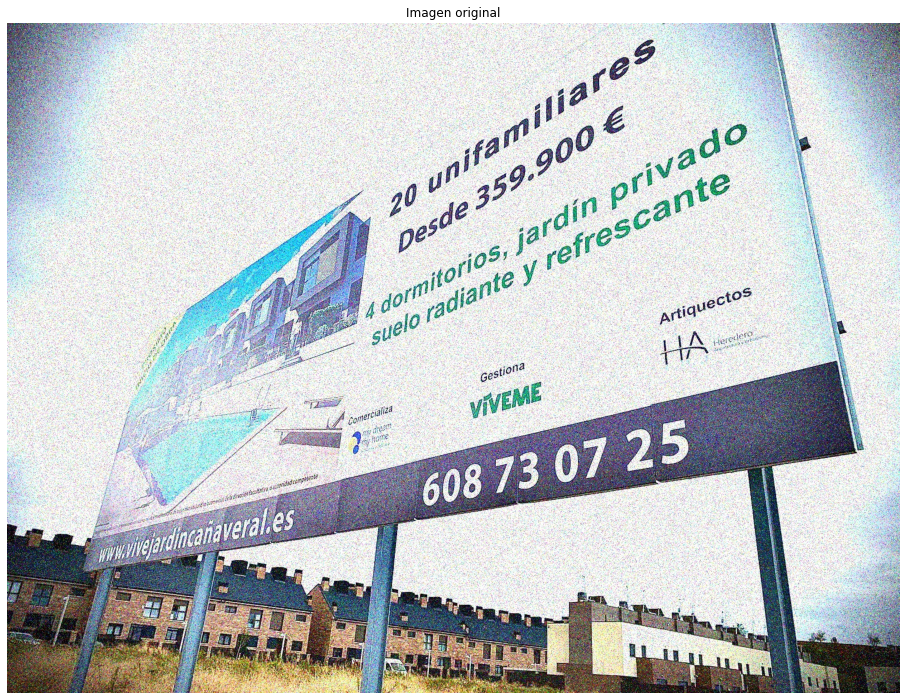

In [ ]:
img = cv2.imread('valla.jpg') #Leemos la imagen.
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#Se pasa a RGB.

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.show()

Primero haremos un encuadre a la imagen.

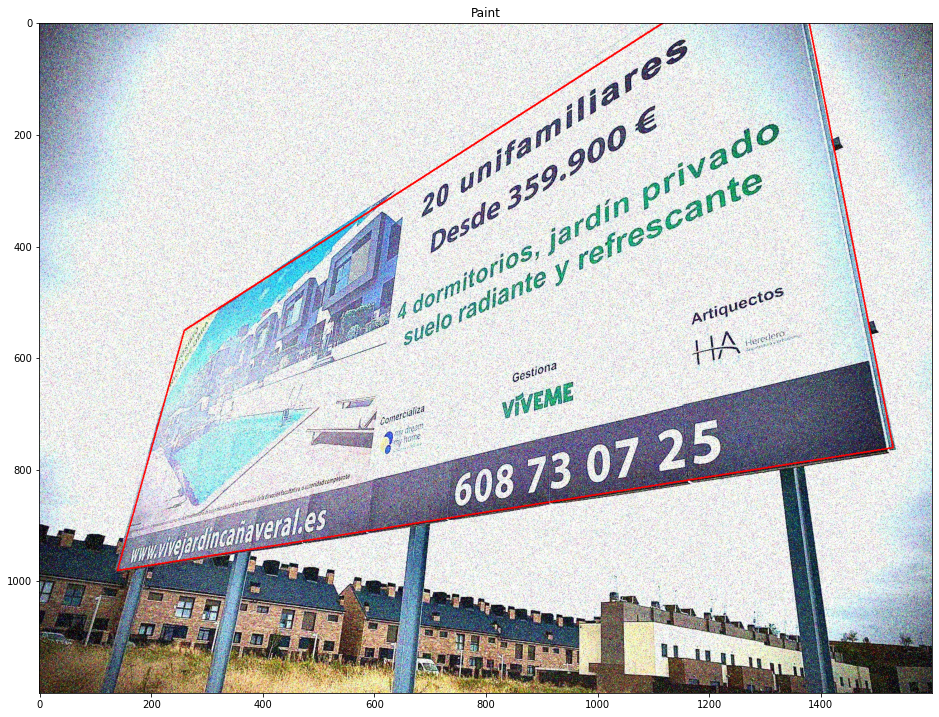

In [ ]:
img_rgb_lines=img_rgb.copy()

#Puntos para encuadrar.
orig_pts=[[260, 550], [1350, -150], [140, 980], [1530, 760]]

#Creamos las lineas.
cv2.line(img_rgb_lines, tuple(orig_pts[0]), tuple(orig_pts[1]), (255,0,0),2)
cv2.line(img_rgb_lines, tuple(orig_pts[1]), tuple(orig_pts[3]), (255,0,0),2)
cv2.line(img_rgb_lines, tuple(orig_pts[3]), tuple(orig_pts[2]), (255,0,0),2)
cv2.line(img_rgb_lines, tuple(orig_pts[2]), tuple(orig_pts[0]), (255,0,0),2)

#Se dibujan las lineas.
plt.figure(figsize=(16, 16))
plt.imshow(img_rgb_lines)
plt.title('Paint')
plt.show()

In [ ]:
#Tomamos las distancias para el nuevo plano. (Tomamos las 2 mas largas para que no se pierda informacion.)

hor=int((((-150-550)**2)+((1350-260)**2))**(0.5))  #Distancia horizontal
ver=int((((1350-1530)**2)+((-150-760)**2))**(0.5)) #Distancia vertical.

dest_pts=[[0, 0], [hor, 0], [0, ver], [hor, ver]] #Nuevo plano.

#Se crea la matriz para la transformacion.
MT=cv2.getPerspectiveTransform(np.float32(orig_pts), np.float32(dest_pts))


1295 927


<ipython-input-332-b40acfe2a1f0>:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r_hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-332-b40acfe2a1f0>:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "

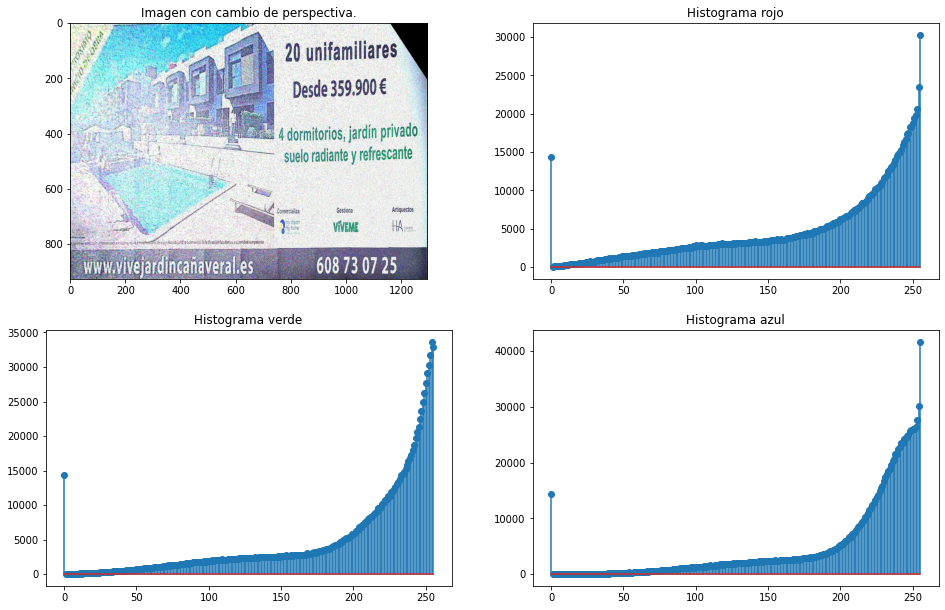

In [ ]:
#Se cambia de perspectiva la imagen.
img_rgb2=cv2.warpPerspective(img_rgb, MT, (hor,  ver))

#Calculo de histogramas por cada canal RGB.
rgb_planes = cv2.split(img_rgb2)

r_hist = cv2.calcHist(rgb_planes, [0], None, [256], [0, 256])
g_hist = cv2.calcHist(rgb_planes, [1],None, [256], [0, 256])
b_hist = cv2.calcHist(rgb_planes, [2],  None, [256], [0, 256])

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.subplot(321)
plt.title('Imagen con cambio de perspectiva.')
plt.imshow(img_rgb2)


plt.subplot(322)
plt.title('Histograma rojo')
plt.stem(r_hist)


plt.subplot(323)
plt.title('Histograma verde')
plt.stem(g_hist)


plt.subplot(324)
plt.title('Histograma azul')
plt.stem(b_hist)


plt.show()

Ahora, se quiere eliminar esa parte negra de la esquina superior izquierda, consecuencia de haber tomado puntos por fuera de la imagen para conservar una forma rectangular.

<ipython-input-333-694b7e98d082>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r_hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-333-694b7e98d082>:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "

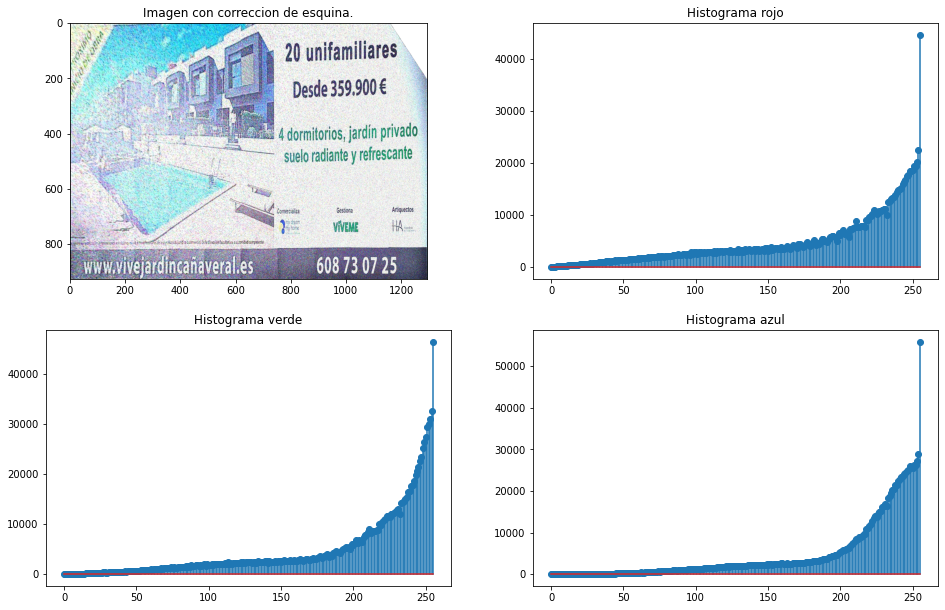

In [ ]:
img_hsv= cv2.cvtColor(img_rgb2, cv2.COLOR_RGB2HSV)
H,S,V= cv2.split(img_hsv)
V[V==0]=255
img_hsv2= cv2.merge((H,S,V))
img_rgb3 = cv2.cvtColor(img_hsv2, cv2.COLOR_HSV2RGB)

#Calculo de histogramas por cada canal RGB.
rgb_planes = cv2.split(img_rgb3)

r_hist = cv2.calcHist(rgb_planes, [0], None, [256], [0, 256])
g_hist = cv2.calcHist(rgb_planes, [1],None, [256], [0, 256])
b_hist = cv2.calcHist(rgb_planes, [2],  None, [256], [0, 256])

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.subplot(321)
plt.title('Imagen con correccion de esquina.')
plt.imshow(img_rgb3)

plt.subplot(322)
plt.title('Histograma rojo')
plt.stem(r_hist)


plt.subplot(323)
plt.title('Histograma verde')
plt.stem(g_hist)


plt.subplot(324)
plt.title('Histograma azul')
plt.stem(b_hist)


plt.show()

Con el codigo siguiente, se busca colocar todos los pixeles que se asemejan al blanco en blanco para no tener diferencias de tono. Lo mismo se hace con el azul de la parte de abajo, se estandariza el azul.

<ipython-input-334-fb27460e5d7a>:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r_hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-334-fb27460e5d7a>:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "

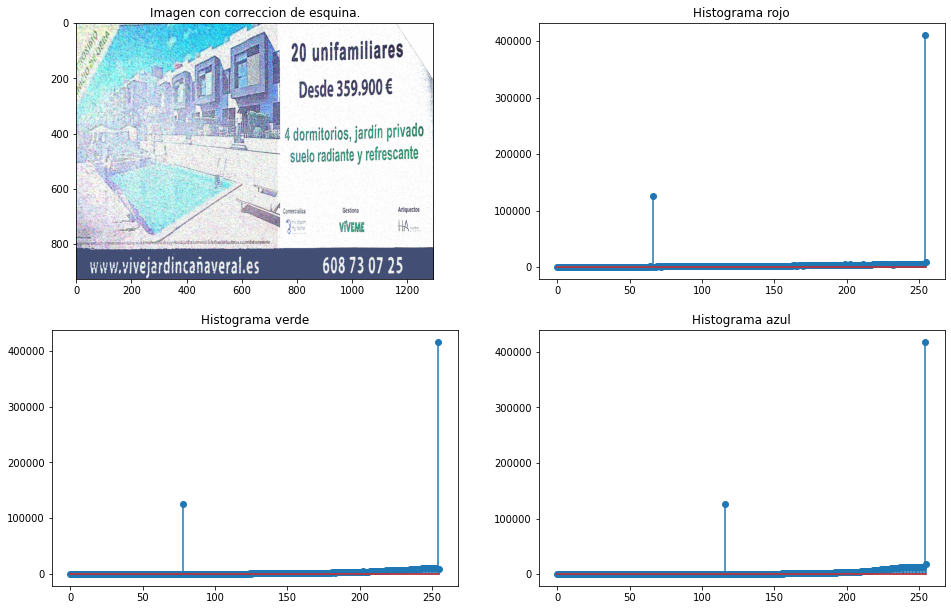

In [ ]:
img_rgb4=img_rgb3
img_hsv= cv2.cvtColor(img_rgb4, cv2.COLOR_RGB2HSV)
H,S,V= cv2.split(img_hsv)
V1=V[:815, 730:]
V2=V[815:, :]

R, G, B= cv2.split(img_rgb3)
R1=R[:815, 730:]
G1=G[:815, 730:]
B1=B[:815, 730:]
R1[V1>200]=254
G1[V1>200]=254
B1[V1>200]=254

R2=R[815:, :]
G2=G[815:, :]
B2=B[815:, :]
R2[V2<220]=66
G2[V2<220]=78
B2[V2<220]=116

img_rgb5= cv2.merge((R1,G1,B1))
img_rgb6= cv2.merge((R2,G2,B2))
img_rgb6 = cv2.medianBlur(img_rgb6,5)
img_rgb4[:815, 730:]=img_rgb5
img_rgb4[815:, :]=img_rgb6


#Calculo de histogramas por cada canal RGB.
rgb_planes = cv2.split(img_rgb4)

r_hist = cv2.calcHist(rgb_planes, [0], None, [256], [0, 256])
g_hist = cv2.calcHist(rgb_planes, [1],None, [256], [0, 256])
b_hist = cv2.calcHist(rgb_planes, [2],  None, [256], [0, 256])

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.subplot(321)
plt.title('Imagen con correccion de esquina.')
plt.imshow(img_rgb4)


plt.subplot(322)
plt.title('Histograma rojo')
plt.stem(r_hist)


plt.subplot(323)
plt.title('Histograma verde')
plt.stem(g_hist)


plt.subplot(324)
plt.title('Histograma azul')
plt.stem(b_hist)


plt.show()

Se mejora la esquina corregida.

<ipython-input-335-4db0b38aa6d9>:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r_hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-335-4db0b38aa6d9>:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "

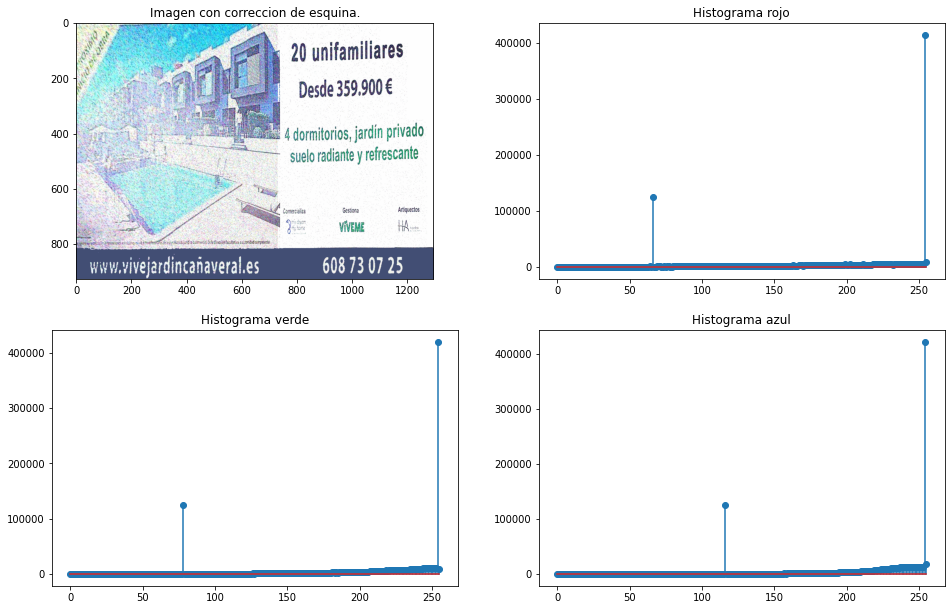

In [ ]:
R, G, B= cv2.split(img_rgb3)

R[:810, 1270:]=254
G[:810, 1270:]=254
B[:810, 1270:]=254
R[:350, 1200:]=254
G[:350, 1200:]=254
B[:350, 1200:]=254
R[:75, 1100:]=254
G[:75, 1100:]=254
B[:75, 1100:]=254

img_rgb5= cv2.merge((R,G,B))


#Calculo de histogramas por cada canal RGB.
rgb_planes = cv2.split(img_rgb5)

r_hist = cv2.calcHist(rgb_planes, [0], None, [256], [0, 256])
g_hist = cv2.calcHist(rgb_planes, [1],None, [256], [0, 256])
b_hist = cv2.calcHist(rgb_planes, [2],  None, [256], [0, 256])

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.subplot(321)
plt.title('Imagen con correccion de esquina.')
plt.imshow(img_rgb5)


plt.subplot(322)
plt.title('Histograma rojo')
plt.stem(r_hist)


plt.subplot(323)
plt.title('Histograma verde')
plt.stem(g_hist)


plt.subplot(324)
plt.title('Histograma azul')
plt.stem(b_hist)


plt.show()

Se aplica difuminado para reducir el ruido. Se hace el difuminado de mediana.

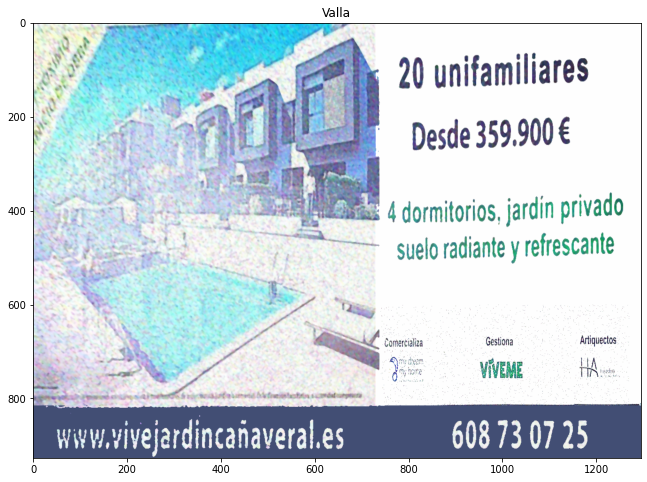

In [ ]:
img_rgb6=img_rgb5
img_rgb6[:600,:] = cv2.medianBlur(img_rgb5[:600,:],5)
img_rgb6[600:815,:740] = cv2.medianBlur(img_rgb5[600:815,:740],5)

#Se dibuja la imagen.
plt.figure(figsize=(16, 8))
plt.imshow(img_rgb6)
plt.title('Valla')
plt.show()

Se le mejora el brillo a la imagen.

<ipython-input-337-e9b2d7167549>:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r_hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-337-e9b2d7167549>:49: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "

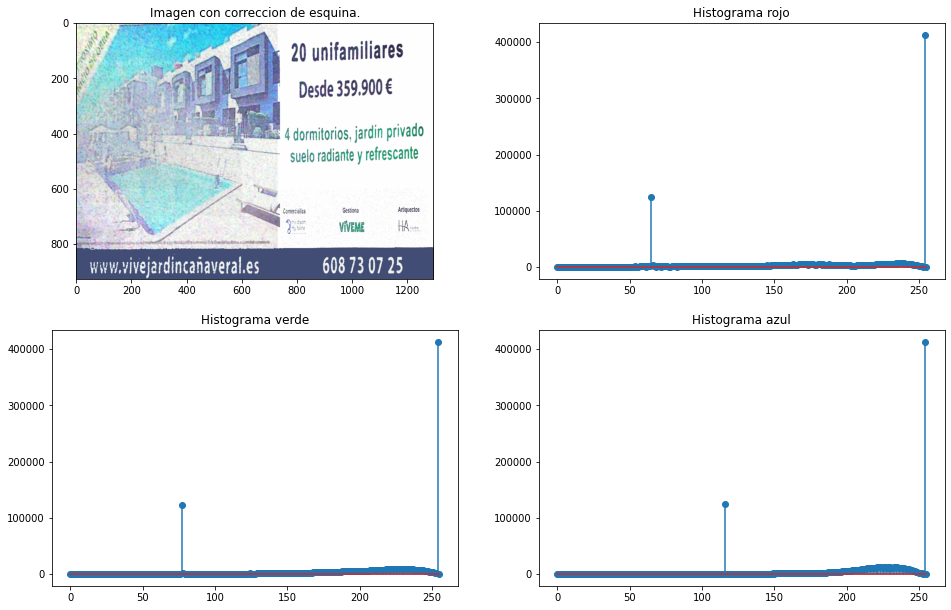

In [ ]:
#Pasamos al formato HSV.
img_hsv= cv2.cvtColor(img_rgb6, cv2.COLOR_RGB2HSV)

#Aumentamos el brillo teniendo en cuenta el overflow que sufre OpenCV.
lim = 255 + 25

a  = 600
b1 = 100
b2 = 700

for i in range(4):
  for x in range(b1,b2):
    for y in range(0,a):
      if img_hsv[x, y][2]>lim:
        img_hsv[x, y][2]=255
      else:
        img_hsv[x, y][2]-=7
  a -= 100
  b1  += 50
  b2 -= 50

#Unimos los canales y se pasa otra vez a RGB.
img_rgb7=cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)


#Calculo de histogramas por cada canal RGB.
rgb_planes = cv2.split(img_rgb7)

r_hist = cv2.calcHist(rgb_planes, [0], None, [256], [0, 256])
g_hist = cv2.calcHist(rgb_planes, [1],None, [256], [0, 256])
b_hist = cv2.calcHist(rgb_planes, [2],  None, [256], [0, 256])

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.subplot(321)
plt.title('Imagen con correccion de esquina.')
plt.imshow(img_rgb7)


plt.subplot(322)
plt.title('Histograma rojo')
plt.stem(r_hist)


plt.subplot(323)
plt.title('Histograma verde')
plt.stem(g_hist)


plt.subplot(324)
plt.title('Histograma azul')
plt.stem(b_hist)


plt.show()

En los dos siguientes codigos se le aplica el proceso de apertura y cierre vistos en clase a dos secciones de la imagen por separado. (Erosionar, dilatar dos veces y volver a erosionar)

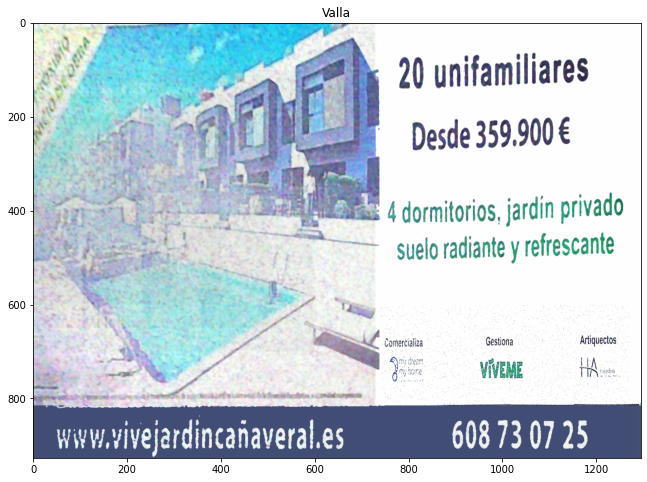

In [ ]:
#Separamos los canales RGB.
R, G, B= cv2.split(img_rgb7[:815,:740])

#Creamos un kernel.
kernel= np.ones((3,3), np.uint8)

#Realizamos los procesos de erosion y dilatacion para cada canal.
R= cv2.erode(R, kernel, iterations=1)
G= cv2.erode(G, kernel, iterations=1)
B= cv2.erode(B, kernel, iterations=1)

R= cv2.dilate(R, kernel, iterations=2)
G= cv2.dilate(G, kernel, iterations=2)
B= cv2.dilate(B, kernel, iterations=2)

R= cv2.erode(R, kernel, iterations=1)
G= cv2.erode(G, kernel, iterations=1)
B= cv2.erode(B, kernel, iterations=1)

#Unimos los canales RGB.
img_rgb7[:815,:740]=cv2.merge((R, G, B))

#Se dibuja la imagen.
plt.figure(figsize=(16, 8))
plt.imshow(img_rgb7)
plt.title('Valla')
plt.show()

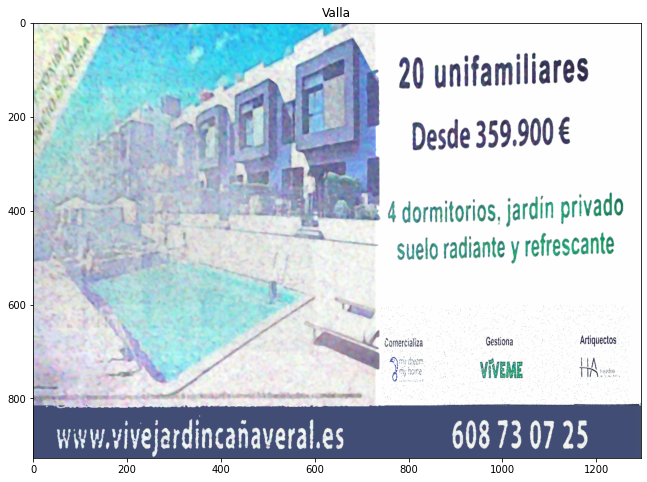

In [ ]:
#Separamos los canales RGB.
R, G, B= cv2.split(img_rgb7[:300,:200])

#Creamos un kernel.
kernel= np.ones((3,3), np.uint8)

#Realizamos los procesos de erosion y dilatacion para cada canal.
R= cv2.erode(R, kernel, iterations=1)
G= cv2.erode(G, kernel, iterations=1)
B= cv2.erode(B, kernel, iterations=1)

R= cv2.dilate(R, kernel, iterations=2)
G= cv2.dilate(G, kernel, iterations=2)
B= cv2.dilate(B, kernel, iterations=2)

R= cv2.erode(R, kernel, iterations=1)
G= cv2.erode(G, kernel, iterations=1)
B= cv2.erode(B, kernel, iterations=1)

#Unimos los canales RGB.
img_rgb7[:300,:200]=cv2.merge((R, G, B))

#img_rgb7[:815,:740] = cv2.bilateralFilter(img_rgb7[:815,:740],5)
img_rgb7[:815,:740] = cv2.medianBlur(img_rgb7[:815,:740],5)

#Se dibuja la imagen.
plt.figure(figsize=(16, 8))
plt.imshow(img_rgb7)
plt.title('Valla')
plt.show()

Por ultimo se le hace un filtro bilateral a la parte izquierda de la imagen para reducir un poco mas el ruido, no obstante esto genera un poco de difuminacion.

<ipython-input-340-9099b4db44d7>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(r_hist)
/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
<ipython-input-340-9099b4db44d7>:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "

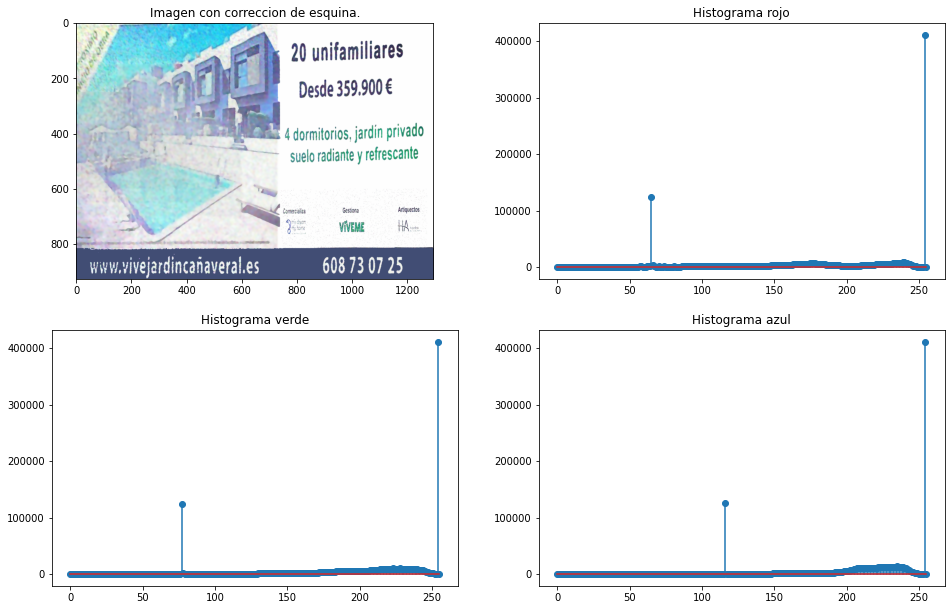

In [ ]:
img_rgb7[150:815,150:740] = cv2.bilateralFilter(img_rgb7[150:815,150:740], 10, 50, 50)
img_rgb7[250:815,0:150] = cv2.bilateralFilter(img_rgb7[250:815,0:150], 10, 50, 50)


#Calculo de histogramas por cada canal RGB.
rgb_planes = cv2.split(img_rgb7)

r_hist = cv2.calcHist(rgb_planes, [0], None, [256], [0, 256])
g_hist = cv2.calcHist(rgb_planes, [1],None, [256], [0, 256])
b_hist = cv2.calcHist(rgb_planes, [2],  None, [256], [0, 256])

#Se dibuja la imagen.
plt.figure(figsize=(16, 16))
plt.subplot(321)
plt.title('Imagen con filtro bilateral.')
plt.imshow(img_rgb7)


plt.subplot(322)
plt.title('Histograma rojo')
plt.stem(r_hist)


plt.subplot(323)
plt.title('Histograma verde')
plt.stem(g_hist)


plt.subplot(324)
plt.title('Histograma azul')
plt.stem(b_hist)


plt.show()